In [9]:
import pandas as pd
import numpy as np
import pygal

In [2]:
df = pd.read_csv("/home/oscar/Desktop/Oscar/OnlineNewsPopularity.csv")

In [4]:
df.columns = [x.strip() for x in df.columns]

In [6]:
def plot_histogram(data, n_bins = 10):
    freq, bins = np.histogram(data, bins=n_bins)
    hist = pygal.Histogram()
    hist.add('Wide bars', list(zip(freq, bins, bins[1:])))
    return hist

In [7]:
ls_cont = ['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 
           'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 
           'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 
           'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 
           'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 
           'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 
           'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words',
           'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
           'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 
           'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 
           'abs_title_subjectivity', 'abs_title_sentiment_polarity']

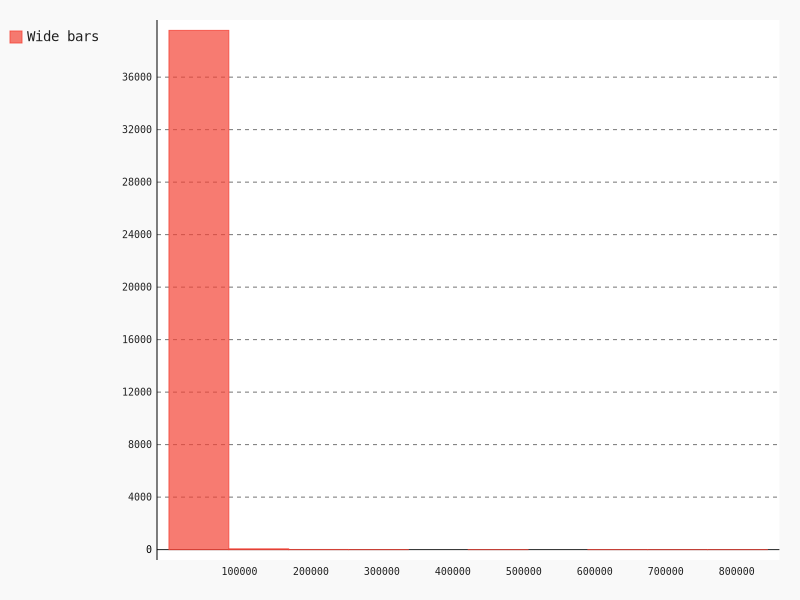

In [11]:
plot_histogram(data=df["shares"])

In [13]:
df["shares"].describe(percentiles = [x/10 for x in range(10)]+[0.01, 0.05, 0.95, 0.99])

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
0%            1.000000
1%          381.000000
5%          584.000000
10%         708.000000
20%         870.600000
30%        1000.000000
40%        1200.000000
50%        1400.000000
60%        1800.000000
70%        2300.000000
80%        3400.000000
90%        6200.000000
95%       10800.000000
99%       31657.000000
max      843300.000000
Name: shares, dtype: float64

In [21]:
df = df[(df["shares"] >= 381) & (df["shares"] <= 31657)]

In [23]:
df.shape

(38853, 61)

In [24]:
38853/39644.000000

0.9800474220563011

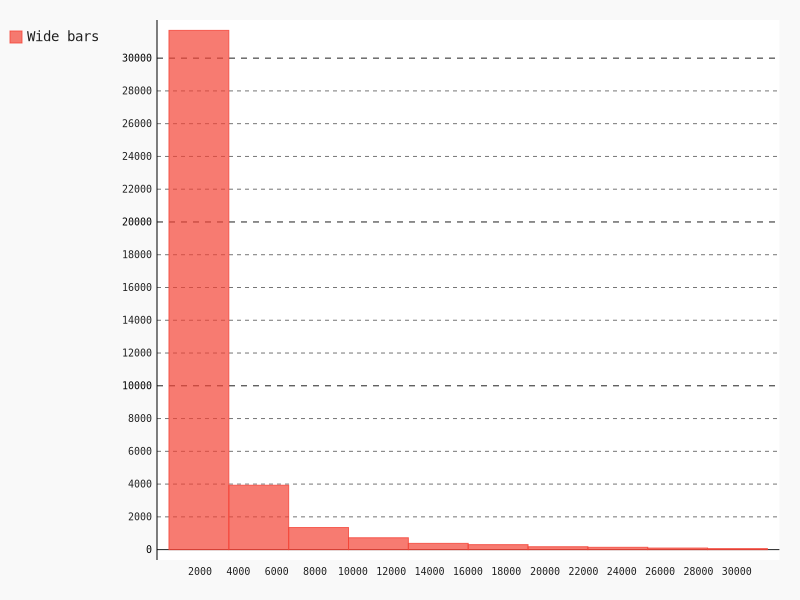

In [22]:
plot_histogram(df["shares"])|

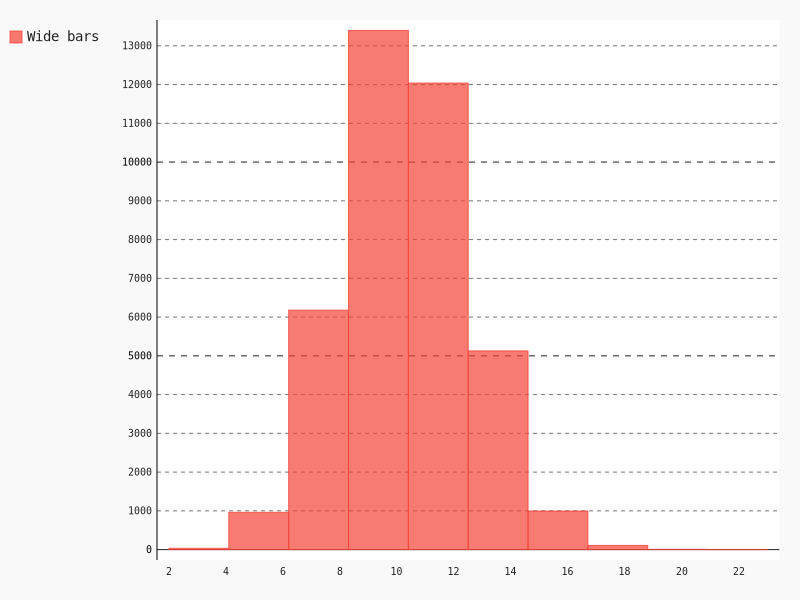

In [25]:
plot_histogram(df["n_tokens_title"])

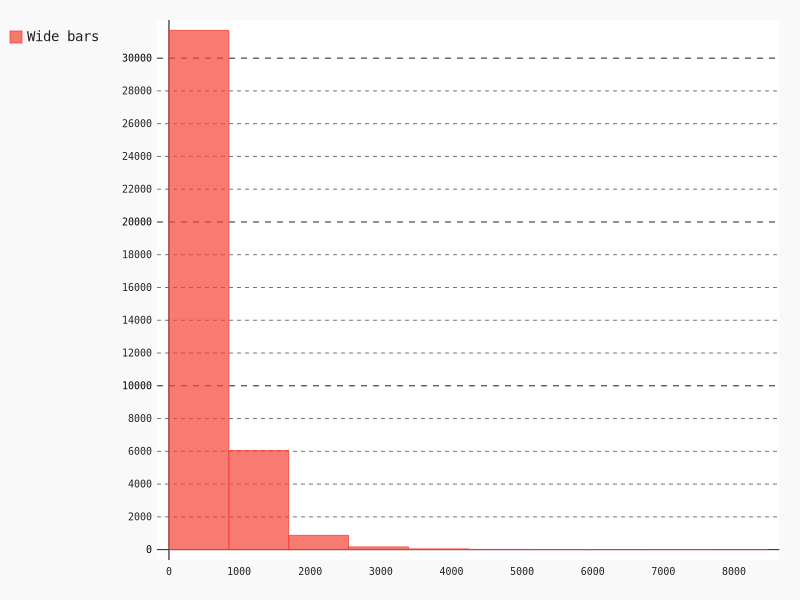

In [26]:
plot_histogram(df["n_tokens_content"])

In [29]:
df["n_tokens_content"].describe(percentiles = [x/10 for x in range(10)]+[0.01, 0.02, 0.03, 0.04, 0.05, 0.95, 0.99])

count    38853.000000
mean       546.955345
std        471.158105
min          0.000000
0%           0.000000
1%           0.000000
2%           0.000000
3%          26.560000
4%          89.000000
5%         104.600000
10%        153.000000
20%        218.000000
30%        276.000000
40%        335.000000
50%        410.000000
60%        507.000000
70%        633.000000
80%        811.000000
90%       1091.000000
95%       1408.400000
99%       2253.480000
max       8474.000000
Name: n_tokens_content, dtype: float64

In [31]:
df = df[(df["n_tokens_title"] <= 2253)]

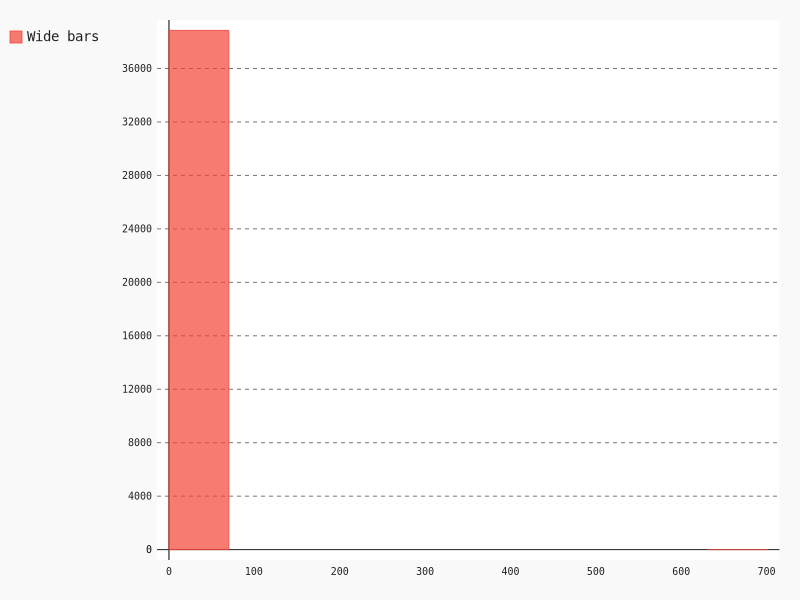

In [32]:
plot_histogram(df["n_unique_tokens"])

In [34]:
df["n_unique_tokens"].describe(percentiles = [x/10 for x in range(10)]+[0.01, 0.02, 0.03, 0.04, 0.05, 0.95, 0.99])

count    38853.000000
mean         0.548187
std          3.556312
min          0.000000
0%           0.000000
1%           0.000000
2%           0.000000
3%           0.144446
4%           0.320599
5%           0.348862
10%          0.406102
20%          0.453611
30%          0.485143
40%          0.512929
50%          0.538922
60%          0.565217
70%          0.592784
80%          0.625874
90%          0.675884
95%          0.719915
99%          0.801214
max        701.000000
Name: n_unique_tokens, dtype: float64

In [37]:
media = df["n_unique_tokens"].mean()

In [38]:
sigma = df["n_unique_tokens"].std()

In [43]:
media-3*sigma

-10.120748261325907

In [44]:
media + 3*sigma

11.217121646730988

In [47]:
df = df[(media-3*sigma <= df["n_unique_tokens"])  & (df["n_unique_tokens"] <= media + 3*sigma )]

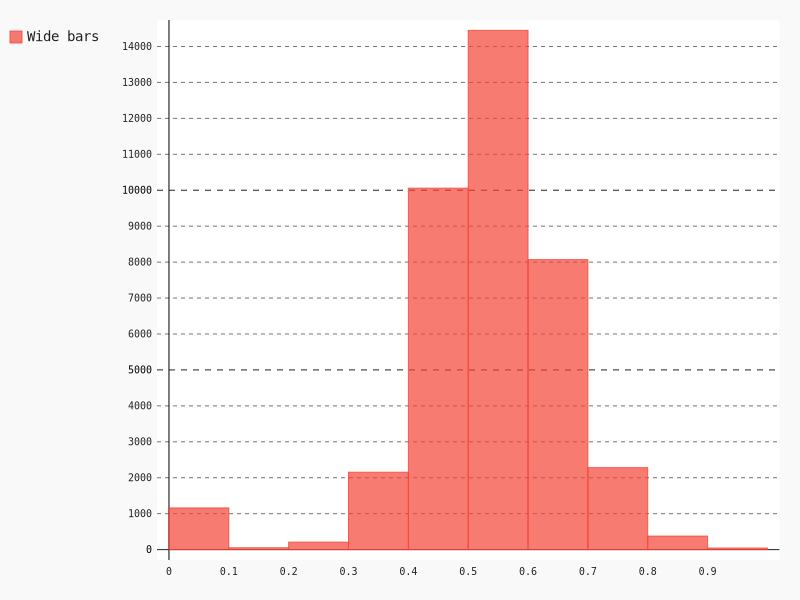

In [48]:
plot_histogram(df["n_unique_tokens"])